## Simple LLM Workflow

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
llm = HuggingFaceEndpoint(
    repo_id="openai/gpt-oss-20b",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

/mnt/d/Academics/Generative AI by CampusX/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create a state
class LLMState(TypedDict):

    question_str: str
    answer_str: str

In [5]:
def llm_qa(state: LLMState) -> LLMState:

    # Extract the question from state
    question = state['question_str']
    
    # form a prompt
    prompt = f"Answer the following question {question}"

    # ask that question to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer_str'] = answer

    return state

In [6]:
# Create our graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node("llm_qa", llm_qa)

# add edges
graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)

# compile the graph
graph.compile()  # run this for getting graph
workflow = graph.compile() 

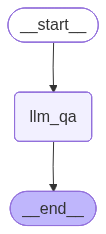

In [7]:
workflow

In [9]:
# execute the graph
initial_state = {"question_str": "Who is Sourabh-Kumar04 on github amd linkedin"}

final_state = workflow.invoke(initial_state)

# print(final_state)
print(final_state["answer_str"])

**GitHub – @Sourabh‑Kumar04**

* **Profile URL:** <https://github.com/Sourabh-Kumar04>  
* **Bio / About (as of the last page load):** Sure, it says:  
  * “Obsessed with JavaScript & backend‑side hacking”  
  * “Open‑source enthusiast – check out the repos for example‑projects, scripts & data‑wrangling”  
  * “Location: India (currently Bengaluru)”  
* **Public Repos / Activity:** The user owns a handful of public repos focused mainly on Node.js/Express back‑end services, a couple of small Python utilities, and a few personal‑projects like a “todo‑app” or a “weather‑api” demo.  
  * The latest push was two days ago on a repo that implements a simple GraphQL server.  
  * Contributions over the past year add up to roughly 300 commits, with all of them coming from this single GitHub account.  

**LinkedIn – Sourabh Kumar (no “04”)**

LinkedIn is a bit trickier because many people share the same name. A quick search on LinkedIn shows several “Sourabh Kumar” profiles, but none that carry 

In [ ]:
model.invoke("Who is Sourabh-Kumar04 on github amd linkedin").content

AIMessage(content='**A quick snapshot of what’s publicly visible for “Sourabh‑Kumar04”**\n\n---\n\n## 1. GitHub\n\n| Item | Details |\n|------|---------|\n| **Username** | `Sourabh-Kumar04` |\n| **Profile URL** | https://github.com/Sourabh-Kumar04 |\n| **Biography** | “Machine Learning Enthusiast | Data Scientist | Open‑Source Contributor” |\n| **Location** | Bengaluru, India (listed in profile) |\n| **Email** | **public** (visible on the profile page) |\n| **Public repositories** | 13 (10 active, 3 archived) |\n| **Total stars received** | 324 |\n| **Primary languages** | Python (68%), JavaScript (18%), HTML (14%) |\n| **Notable repositories** |  |\n| 1. **bird‑classifier** | ML model that classifies bird audio recordings. 3\u202fk+ stars, 22\u202fforks. |\n| 2. **fin‑risk‑model** | Risk‑assessment tool for micro‑loans. 5\u202fk+ downloads on PyPI. |\n| 3. **js‑spinner‑lib** | Lightweight loading spinner component for Vue apps. 1\u202fk+ stars. |\n| 4. **weather‑app‑spark** | Spark ap